In [1]:
import numpy as np
import matplotlib.pyplot as pt

In [2]:
# first let's compare the linear models

**MODELS TO BE COMPARED**  
***Linear regression (with normal equation and gradient descent)***  
***Polynomial regression***  
***Ridge regression***  
***Lasso regression***  
***Elastic net regression***  

# LINEAR REGRESSION USING NORMAL EQUATION

In [3]:
# sample dataset for linear regression
np.random.seed(42)
X  = 3 + np.random.randn(100,1)
y  = 4 + 2*X + np.random.randn(100,1)

In [4]:
X.shape,y.shape

((100, 1), (100, 1))

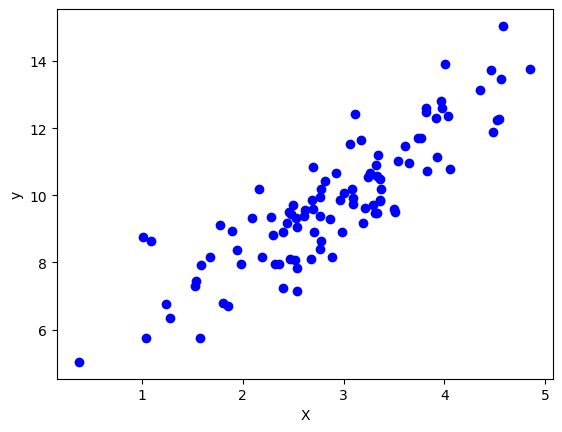

In [5]:
# plot these randomly generated points
pt.xlabel("X")
pt.ylabel("y")
pt.plot(X,y,"bo")
pt.show()

In [6]:
# using normal equation calculating the theta best
# add 1's column as theta-not
X_p = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T.dot(y))
theta_best

array([[4.43719931],
       [1.85674284]])

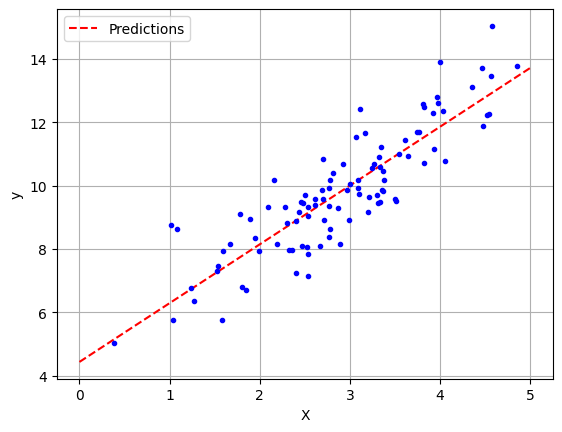

In [7]:
# plotting the prediction line 
from sklearn.preprocessing import add_dummy_feature
X_new = np.array([[0],[5]])
X_new_b = add_dummy_feature(X_new) # adding 1 to X_new
y_predict = X_new_b @ theta_best
pt.plot(X_new,y_predict,"r--",label="Predictions")
pt.plot(X,y,"b.")
pt.xlabel("X")
pt.ylabel("y")
pt.grid(True)
pt.legend()
pt.show()

# LINEAR REGRESSION USING GRADIENT DESCENT

In [8]:
# I am going to use the same code as above and only optimize it using GD
# sample dataset for linear regression
np.random.seed(80)
X  = 3 + np.random.randn(100,1)
y  = 4 + 2*X + np.random.randn(100,1)

In [9]:
X.shape,y.shape

((100, 1), (100, 1))

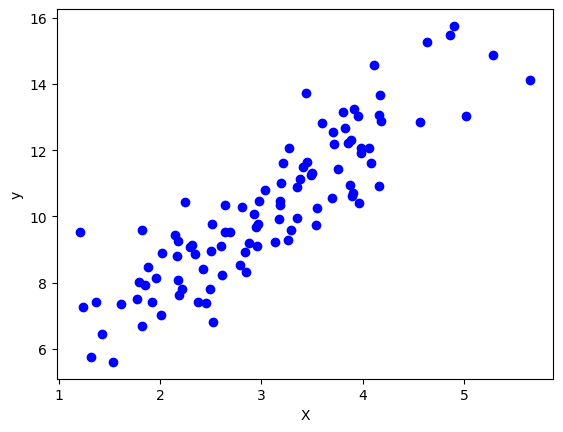

In [10]:
# plot these randomly generated points
pt.xlabel("X")
pt.ylabel("y")
pt.plot(X,y,"bo")
pt.show()

In [11]:
# applying Gradient descent
X_p = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T.dot(y))
theta_best

array([[3.93914346],
       [2.06107104]])

In [12]:
# applying Gradient descent
eta = 0.05
n_epochs = 1000
m = len(X_p)
np.random.seed(80)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    gradient = 2/m * X_p.T @ (X_p @ theta - y)
    theta_bgd = theta - eta * gradient
    print(f"For epoch {epoch} gradient is: {gradient}")
    print(f"For epoch {epoch} theta is: {theta}")

For epoch 0 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 0 theta is: [[1.89985294]
 [0.20880295]]
For epoch 1 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 1 theta is: [[1.89985294]
 [0.20880295]]
For epoch 2 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 2 theta is: [[1.89985294]
 [0.20880295]]
For epoch 3 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 3 theta is: [[1.89985294]
 [0.20880295]]
For epoch 4 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 4 theta is: [[1.89985294]
 [0.20880295]]
For epoch 5 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 5 theta is: [[1.89985294]
 [0.20880295]]
For epoch 6 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 6 theta is: [[1.89985294]
 [0.20880295]]
For epoch 7 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 7 theta is: [[1.89985294]
 [0.20880295]]
For epoch 8 gradient is: [[-15.40752938]
 [-50.52289415]]
For epoch 8 theta is: [[1.89985294]
 [0.20880295]]
For epoch 9 gradien

In [13]:
theta_bgd

array([[2.6702294 ],
       [2.73494766]])

In [14]:
# by seeing the cell number one can assume that it took almost 8 runs to get theta as same as normal equation
# now let's see by using STOCHASTIC GD

# Theta_best using normal eqn: array([[3.93914346],[2.06107104]])
# Theta_best using Gradient Descent: array([[3.93847517],[2.06127162]])

n_epochs = 1000
t0,t1 = 10000,20000
def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(100)
theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_p[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta_sgd = theta - eta * gradients
theta_sgd

array([[1.90083989],
       [4.7498603 ]])

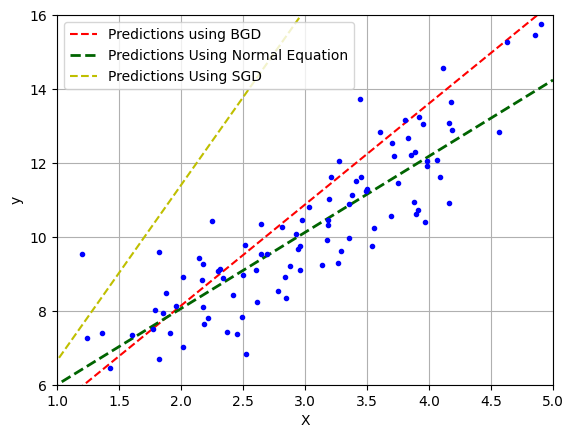

In [19]:
# as we can see here that the theta given by Batch Gradient descent and Normal equation is almost same but using SGD it is way different.
# Plotting graphs for all the thetas.

# Using BGD
from sklearn.preprocessing import add_dummy_feature
X_new = np.array([[0],[5]])
X_new_b = add_dummy_feature(X_new) # adding 1 to X_new
y_predict = X_new_b @ theta_bgd
y_predict_normal = X_new_b @ theta_best
y_predict_sgd = X_new_b @ theta_sgd
pt.plot(X_new,y_predict,"r--",label="Predictions using BGD")
pt.plot(X_new,y_predict_normal,linestyle = "--",color="darkgreen",linewidth=2,label="Predictions Using Normal Equation")
pt.plot(X_new,y_predict_sgd,"y--",label="Predictions Using SGD")
pt.plot(X,y,"b.")
pt.xlabel("X")
pt.ylabel("y")
pt.xlim(1,5)
pt.ylim(6,16)
pt.grid(True)
pt.legend()
pt.show()

# POLYNOMIAL REGRESSION